In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#loading the data 

df_species = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 0)

df_sites = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 1)

df_observations = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 2)




In [ ]:
#removing empty columns
del df_species["Unnamed: 0"]
del df_species["Unnamed: 1"]

df_species.columns = ["French Name", "Latin Name", "Origin"]

# ligne à ajouter (elle est prise pour les noms des colonnes au chargement)
# ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']


del df_sites["Unnamed: 0"]
del df_sites["Unnamed: 1"]

# removing the first line containing the names of the columns
df_sites.drop(0, inplace = True) 

# Renaming the columns names for sites 
df_sites.columns = ["Transect", "X","Y","Type","Site","Site2"]

In [12]:
df_sites

,Transect,X,Y,Type,Site,Site2
1,Aéroport,714593,1614233,Mangrove,S1,SIPI
2,Aéroport,714416,1614194,Mangrove,S1,S1P2
3,Aéroport,714133,1614141,Mangrove,S1,S1P3
4,Aéroport,713914,1614103,Mangrove,S1,S1P4
5,Aéroport,713719,1614062,Mangrove,S1,S1P5
...,...,...,...,...,...,...
646,Bois Pothau,723470,1626744,Agricole,S65,S65P6
647,Bois Pothau,723445,1626828,Agricole,S65,S65P7
648,Bois Pothau,723427,1626945,Forêt sèche,S65,S65P8
649,Bois Pothau,723481,1627061,Forêt sèche,S65,S65P9


In [16]:
df_sites

,Transect,X,Y,Type,Site,Site2
1,Aéroport,714593,1614233,Mangrove,S1,SIPI
2,Aéroport,714416,1614194,Mangrove,S1,S1P2
3,Aéroport,714133,1614141,Mangrove,S1,S1P3
4,Aéroport,713914,1614103,Mangrove,S1,S1P4
5,Aéroport,713719,1614062,Mangrove,S1,S1P5
...,...,...,...,...,...,...
646,Bois Pothau,723470,1626744,Agricole,S65,S65P6
647,Bois Pothau,723445,1626828,Agricole,S65,S65P7
648,Bois Pothau,723427,1626945,Forêt sèche,S65,S65P8
649,Bois Pothau,723481,1627061,Forêt sèche,S65,S65P9


In [ ]:
# Descrbing the tables dimensions

def describe(df, df_name):
    print("Description of ",df_name)
    nLines, nColums = df.shape
    print("Number of lines :",nLines)
    print("Number of columns :",nColums)
    print("Columns names :  ", " - ".join(df.keys()))
    print("")

describe(df_species, "df_species")
describe(df_sites, "df_sites")
describe(df_observations, "df_observations")



Description of  df_species
Number of lines : 86
Number of columns : 3
Columns names :   French Name - Latin Name - Origin

Description of  df_sites
Number of lines : 650
Number of columns : 6
Columns names :   Transect - X - Y - Type - Site - Site2

Description of  df_observations
Number of lines : 114497
Number of columns : 26
Columns names :   Nom observateur - code département - Nom transect - date - 1er, 2e ou 3e passage - nuages - pluie - vent - visibilité - N° point - heure début - ESPECE - distances de contact - Unnamed: 13 - Unnamed: 14 - Unnamed: 15 - Unnamed: 16 - Unnamed: 17 - Unnamed: 18 - Unnamed: 19 - Unnamed: 20 - totaux - Unnamed: 22 - Unnamed: 23 - Unnamed: 24 - Unnamed: 25



In [ ]:
#Describing

print(f"There are {len(df_sites["Transect"].unique())} differents transects.")

print(f"There are {len(df_sites["Type"].unique())} differents types of transects.")

print("")
print(f"There are {len(df_species)} differents species")


print("")
print(f"There are {len(df_observations["Nom observateur"].unique()) - 1} different observers.") #Minus the Nan

There are 65 differents transects.
There are 7 differents types of transects.

There are 86 differents species

There are 49 observers.


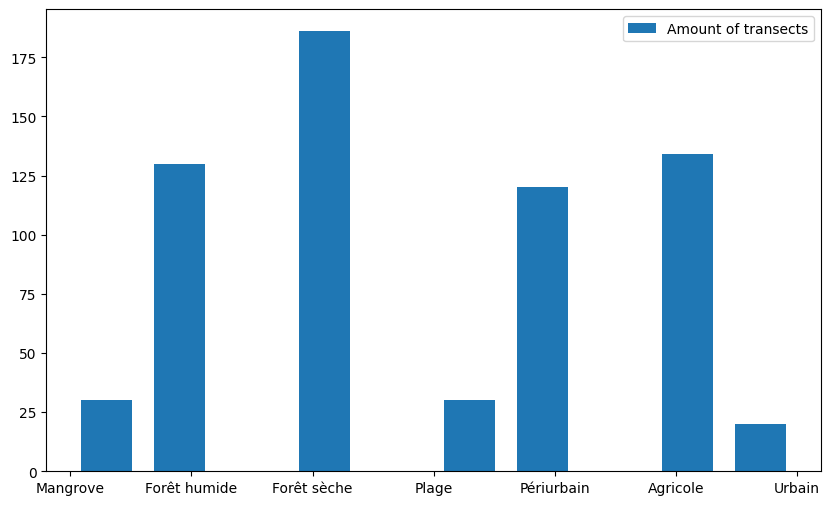

In [63]:

plt.figure(figsize = (10, 6))

n, bins, patches = plt.hist(df_sites["Type"], label = "Amount of transects", rwidth  = 0.7)



plt.legend()
plt.show()

/tmp/ipykernel_30467/261892820.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(locationTypes))


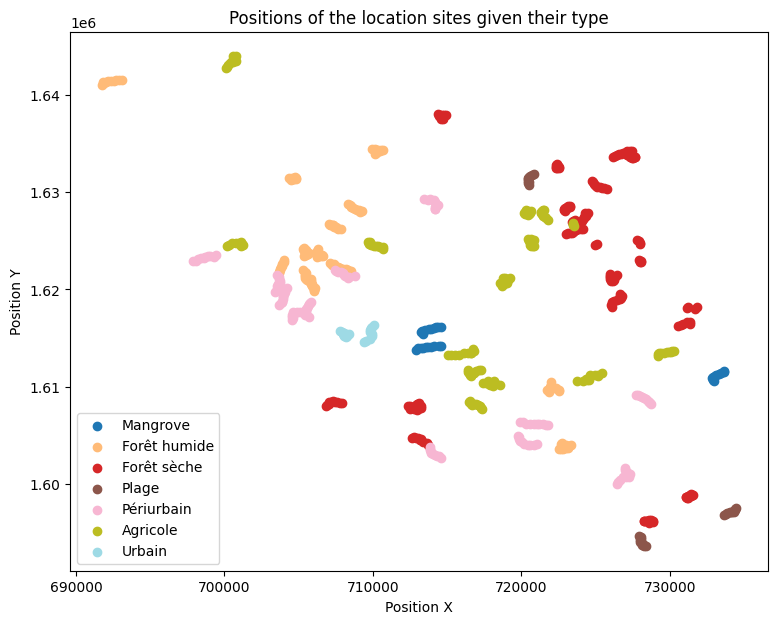

In [72]:

# Plotting the transects

plt.figure(figsize = (9, 7))


locationTypes = df_sites["Type"].unique()
cmap = plt.cm.get_cmap('tab20', len(locationTypes))

for i, t in enumerate(locationTypes):
    group = df_sites[df_sites["Type"] == t]
    plt.scatter(group["X"], group["Y"], label = t, color = cmap(i))

plt.title("Positions of the location sites given their type")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.legend()
plt.savefig("figures/positions.jpeg")
plt.show()


In [73]:
df_observations

,Nom observateur,code département,Nom transect,date,"1er, 2e ou 3e passage",nuages,pluie,vent,visibilité,N° point,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,totaux,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<100m,NaN,> 100m,NaN,vol,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Auditif,Visuel,Auditif,Visuel,NaN,Auditif,"Visuel (sans""Vol"")","A+V (sans ""Vol"")","A+V (avec ""Vol"")",NaN
2,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1,0,1,1,NaN
3,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,1,1,1,NaN
4,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,2,0,2,2,NaN
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,1,0,1,1,NaN
114494,MAUGEE Lévy,972.0,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,2,0,2,2,NaN
114495,MAUGEE Lévy,972.0,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,...,2,NaN,NaN,NaN,NaN,3,0,3,3,NaN
